# Plot output

In [2]:
from pyhdx.fileIO import load_fitresult
from pyhdx.batch_processing import yaml_to_hdxm
import proplot as pplt
from pyhdx.plot import *
import yaml
from pathlib import Path

In [3]:
data_dir = Path() / '..' / '..' / 'tests' / 'test_data' / 'input'
output_dir = Path() / '..' / '..' / 'tests' / 'test_data' / 'output'
yaml_dict = yaml.safe_load(Path(data_dir / 'data_states.yaml').read_text())

state = 'SecB_tetramer'
hdxm = yaml_to_hdxm(yaml_dict[state], data_dir=data_dir, name=state)
hdxm


HDX Measurement: SecB_tetramer<br><br>Number of peptides:     63<br>Number of residues:     146 (10 - 156)<br>Number of timepoints:   7<br>Timepoints:             0.00, 10.02, 30.00, 60.00, 300.00, 600.00, 6000.00 seconds<br>Coverage Percentage:    88.39<br>Average redundancy:     5.49      <br>Temperature:            303.15 K<br>pH:                     8.0             <br>

A figure of peptide coverage graphs showing RFU per peptide per exposure timepoint:


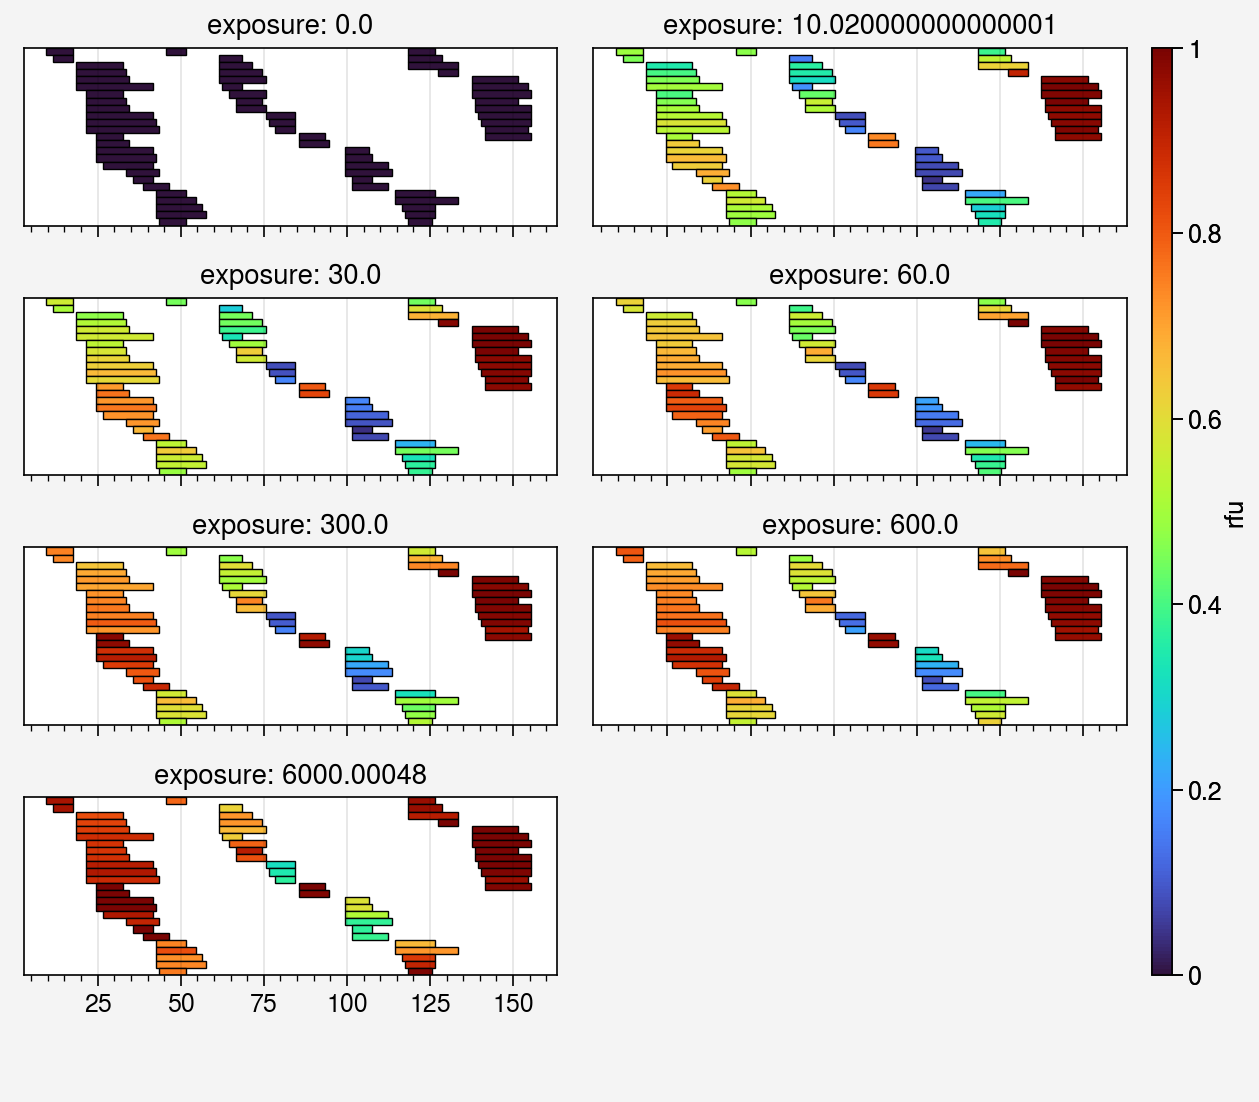

In [4]:
fig, axes, colorbar = peptide_coverage_figure(hdxm.data)


We can also make only a single plot of the peptide data, specifing which data field to use for the colors and
specifing a custom colormap and data range (norm):

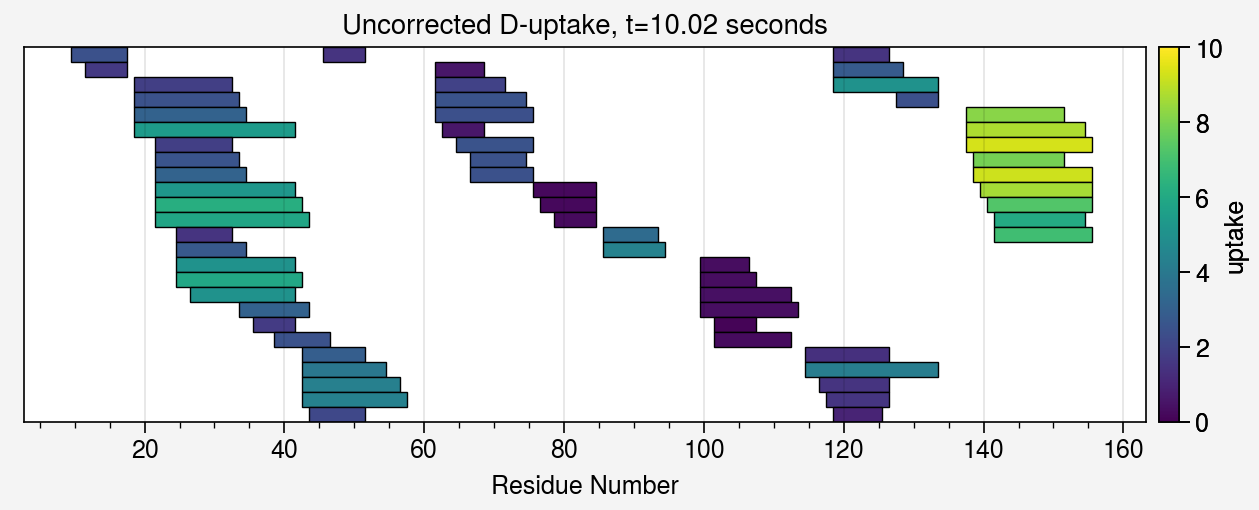

In [5]:
fig, ax = pplt.subplots(width='160mm', aspect=3)
cbar = peptide_coverage(ax, hdxm[1].data, color_field='uptake',
                        cmap='viridis', norm=pplt.Norm('linear', 0, 10))
ax.format(xlabel='Residue Number', title=f'Uncorrected D-uptake, t={hdxm.timepoints[1]:.2f} seconds')

Scatterplots of RFUs per exposure time:

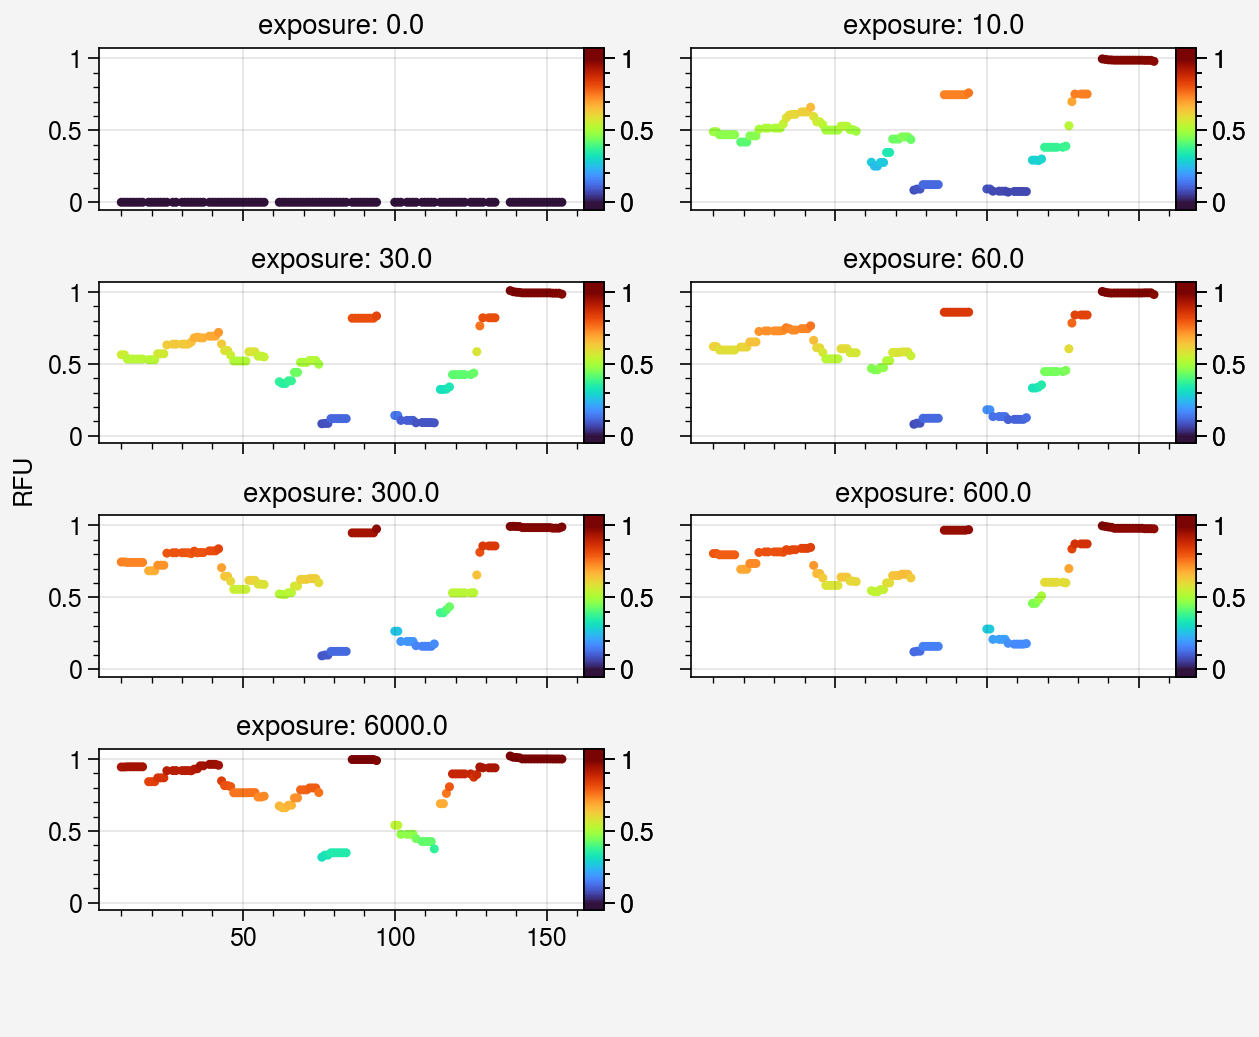

In [6]:
fig, axes, cbars = residue_time_scatter_figure(hdxm)
axes.format(ylabel='RFU')

Plot all exposure timepoints one one axis, with log scale colormap:

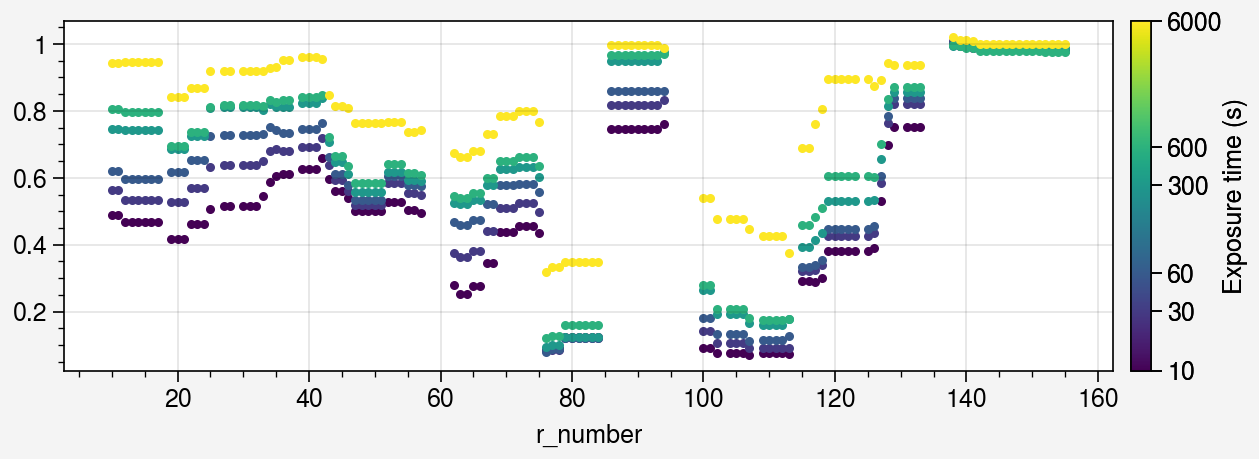

In [7]:
fig, ax = pplt.subplots(width='160mm', aspect=3)
residue_scatter(ax, hdxm)

Next we load a previous fit result to plot ΔG and ΔΔGs:

In [13]:
fitresult = load_fitresult(output_dir / 'ecsecb_tetramer_dimer')

fitresult.mse_loss, fitresult.total_loss

(0.7513929473733795, 1.094485656305879)

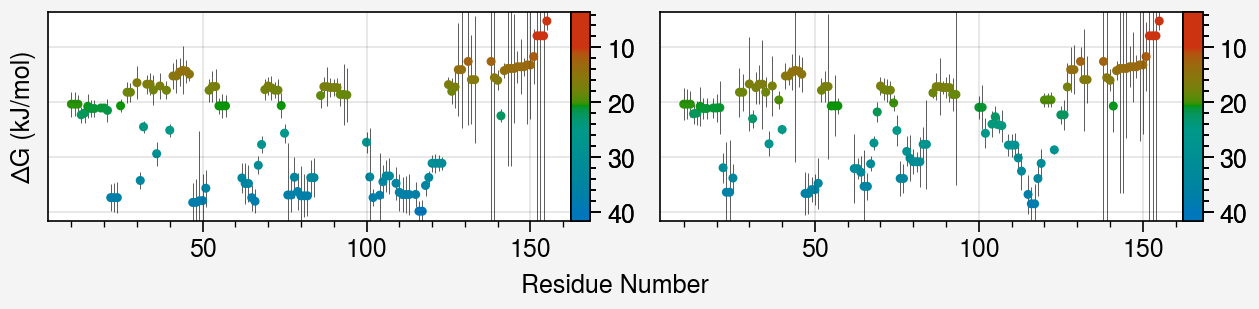

In [14]:
fig, axes, cbars = dG_scatter_figure(fitresult.output.df)


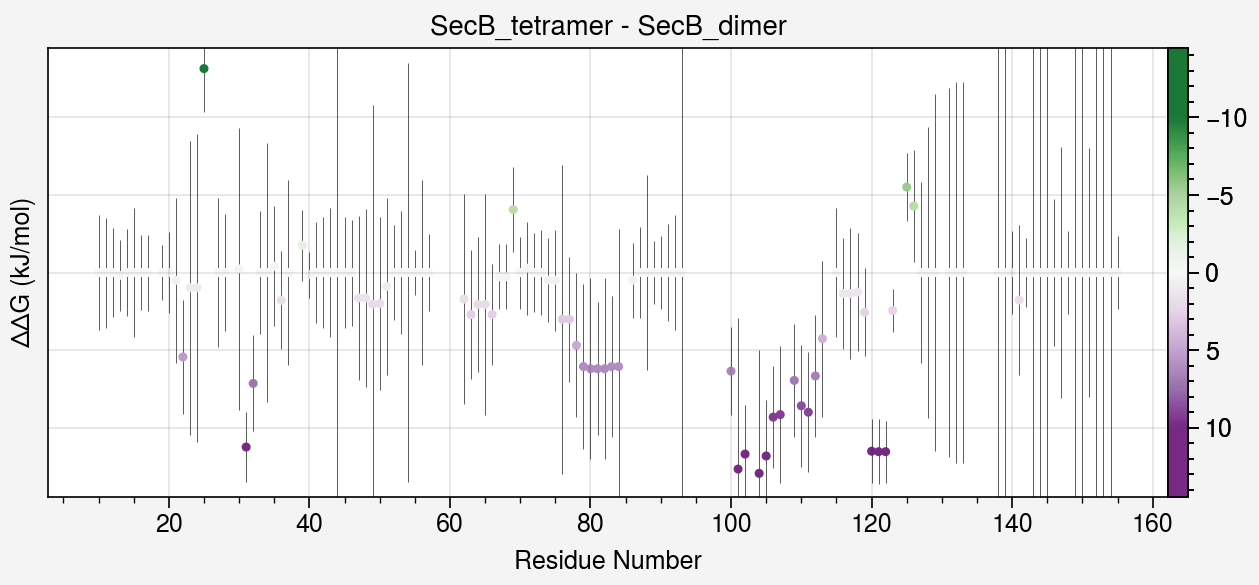

In [10]:
fig, axes, cbars = ddG_scatter_figure(fitresult.output.df, reference=1)


Using Panda's built-in plotting of dataframes:

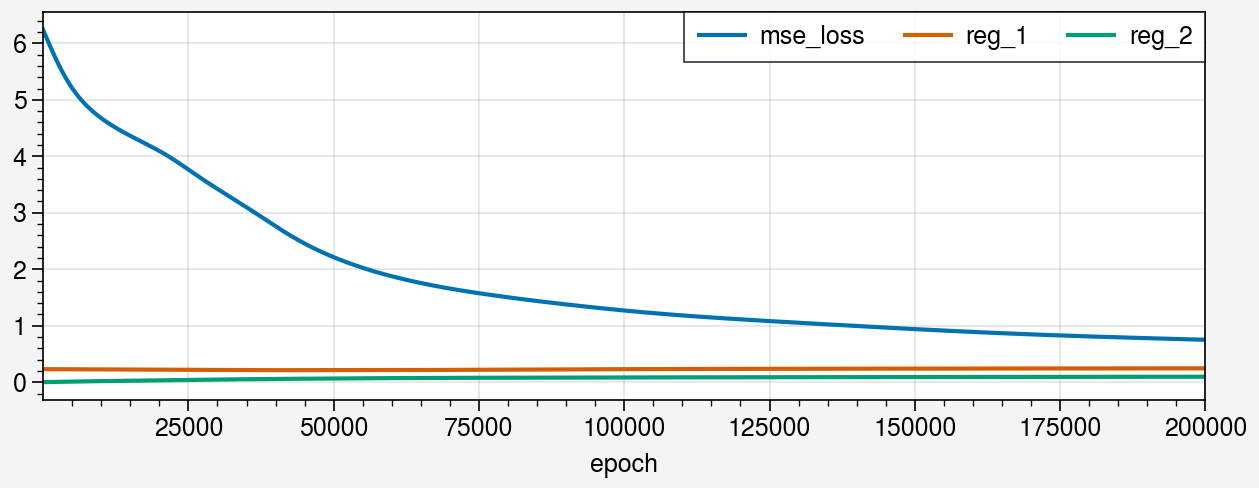

In [11]:
fig, ax = pplt.subplots(width='160mm', aspect=3)
ax = fitresult.losses.plot(ax=ax)



Plotting of the mean squared error of the fit per peptide for each fitted protein state:

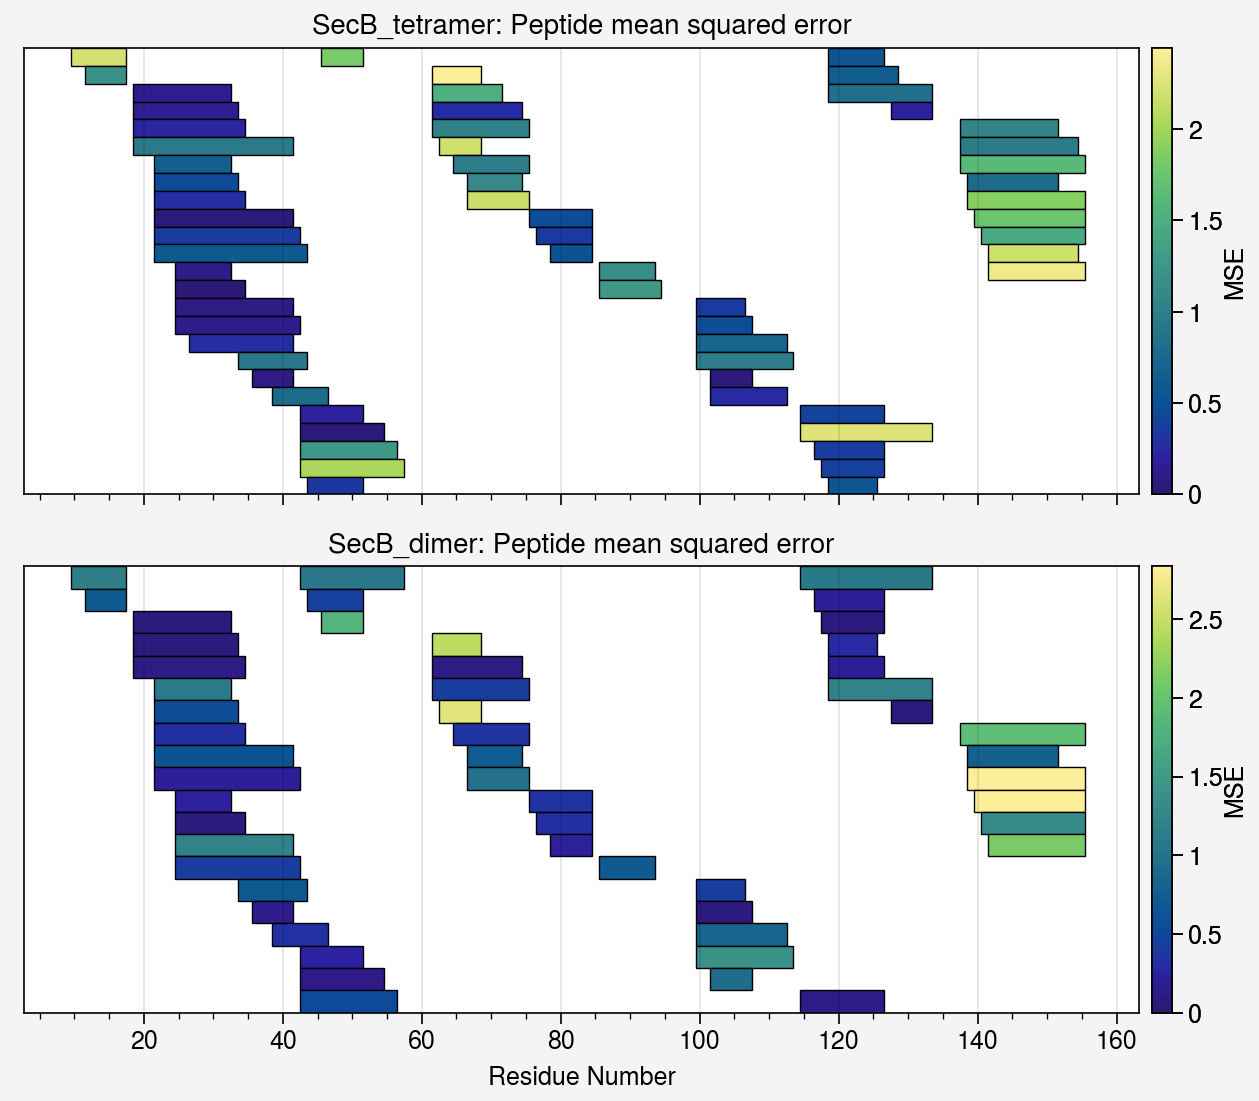

In [15]:
peptide_mse_figure(fitresult, aspect=2.5, ncols=1)